# Etalon interference demo

A simple simulation of the electric field in an optical resonator consisting of two identical planar mirrors under plane wave illumination.
Plane Wave: 
$$
E = \cos\!\left( k\,\big(x) + i\,\phi \right)
$$

Introducing $n$ plane waves with the phase shift due to reflection of $\phi_{\text{mirror(n)}}$ to simulate the wave beeing reflected $n$ times at the mirror surfaces results in:

$$
E = \cos\!\left( k\,\big(n\,L_{\text{tune}}\big) + n 2 \,\phi_{\text{mirror}} \right)
$$

multiplying with $R^n$ gives the mirror attenuation after n reflections.

Finaly the field is summed up to give the total field in the center of the etalon/cavity

In [3]:
import matplotlib.pyplot as plt
import numpy as np

wavelength = 600 * 10 ** (-9)  # Incident waves wavelengths
c = 2.998 * 10**8
k = 2 * np.pi / (wavelength)
omega = k * c
L_tune = np.arange(
    0, 2 * wavelength, 0.01 * 10 ** (-9)
)  # adjust to needed tuning range as needed
R = 0.9  # mirror reflectivity
reflections = np.arange(0, 100, 1)

In [4]:
def phasor_roundtrip(i, mirror_phase):
    phi_rt = 2*k*L_tune + 2*mirror_phase
    return np.exp(1j * i * phi_rt)   # komplexe Phase


/home/jk/CavSimenv/lib/python3.13/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/jk/CavSimenv/lib/python3.13/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


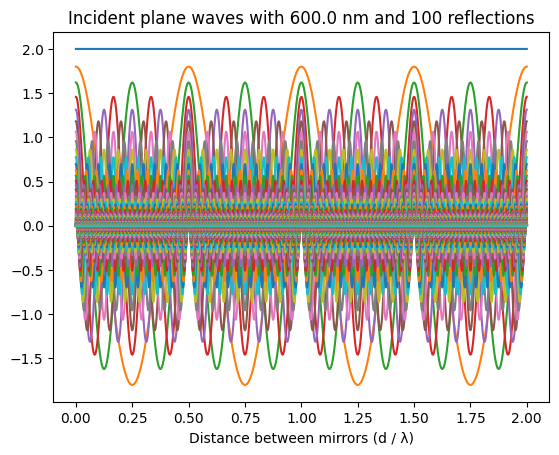

In [5]:
E_total = []
fig1 = plt.figure()
for i in reflections:
    # Factor 2 accounts for the +/- traveling waves (cos is even)
    E = (R**i) * 2 * phasor_roundtrip(i, np.pi)
    E_total.append(E)
    plt.plot(L_tune / wavelength, E)

plt.title(
    "Incident plane waves with "
    + str(wavelength / 10 ** (-9))
    + " nm and "
    + str(len(reflections))
    + " reflections"
)
plt.xlabel("Distance between mirrors (d / λ)")
plt.show()

In [6]:
# Stack contributions
E_total = np.stack(E_total, axis=0)  # shape: (len(reflections), len(L_tune))
E_total.shape

(100, 120000)

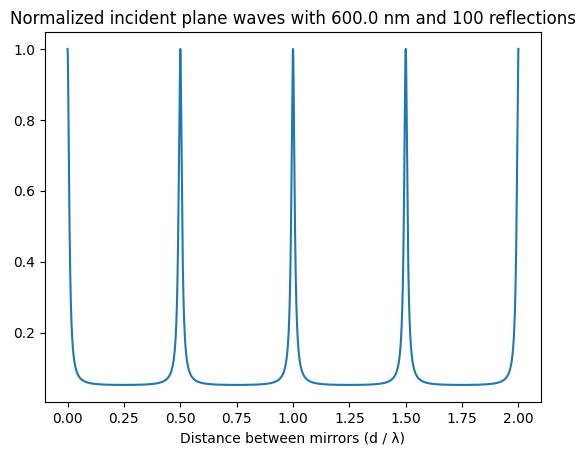

In [7]:
fig2 = plt.figure()
plt.plot(L_tune / wavelength, np.sum(E_total, axis=0) / np.max(np.sum(E_total, axis=0)))
plt.xlabel("Distance between mirrors (d / λ)")
plt.title(
    "Normalized incident plane waves with "
    + str(wavelength / 10 ** (-9))
    + " nm and "
    + str(len(reflections))
    + " reflections"
)
plt.show()

In [12]:

def phasor_roundtrip_angle(i, d, mirrorPhase, theta):
    phi_rt = 2*k*np.cos(theta) * d + 2 * mirrorPhase
    return np.exp(1j * i * phi_rt)   # komplexe Phase


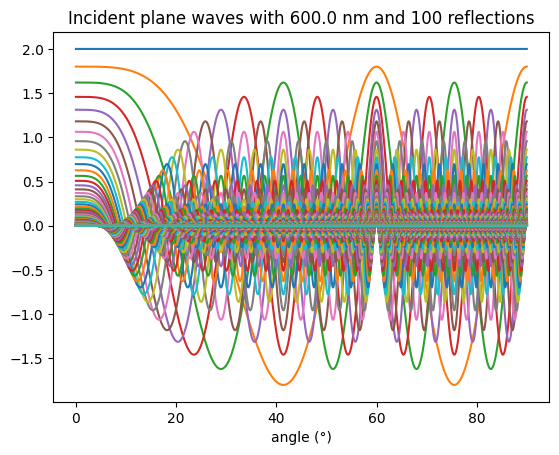

In [13]:
theta = np.arange(0, np.pi / 2, 0.0001)
L_cav = wavelength * 1
d = L_cav
E_total = []
fig3 = plt.figure()
for i in reflections:
    E = ((R) ** i) * 2 * phasor_roundtrip_angle(i, d, np.pi, theta)
    E_total.append(E)
    plt.plot(np.rad2deg(theta), E)
    # plt.plot(WLs,E)
plt.xlabel("angle (°)")

plt.title(
    "Incident plane waves with "
    + str(wavelength / 10 ** (-9))
    + " nm and "
    + str(len(reflections))
    + " reflections"
)
plt.show()

In [14]:
# Stack contributions
E_total = np.stack(E_total, axis=0)  # shape: (len(reflections), len(L_tune))
E_total.shape

(100, 15708)

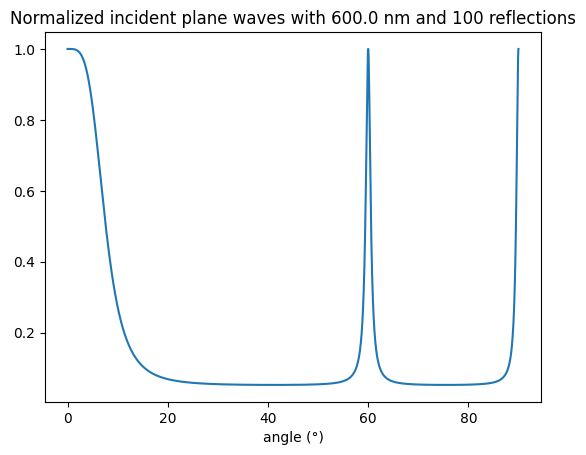

In [15]:
fig4 = plt.figure()
plt.plot(np.rad2deg(theta), np.sum(E_total, axis=0) / np.max(np.sum(E_total, axis=0)))
plt.xlabel("angle (°)")
plt.title(
    "Normalized incident plane waves with "
    + str(wavelength / 10 ** (-9))
    + " nm and "
    + str(len(reflections))
    + " reflections"
)
plt.show()